In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [4]:
# Load the Dataset
df = pd.read_csv('Pharma_Industry.csv')
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [7]:
# Explore the Data
print(df.head())     # View first few rows
print(df.info())     # Data types and missing values
print(df['Drug Response'].value_counts())  # Check the number of 0s and 1s

   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 

In [16]:
# Data Cleaning and Preprocessing
df = df.dropna()

# Split data into features (X) and target (y)
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

# If there are categorical features, encode them numerically
X = pd.get_dummies(X, drop_first=True)

# Split into Train and Test Sets
# 80% for training, 20% for testing; stratify to keep class ratio same.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
# Build and Train the Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Model Predictions
# Predict on the test set.
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [19]:
# Evaluation
# Evaluate model using common classification metrics.
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        48
           1       0.79      0.79      0.79        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100

Confusion Matrix:
[[37 11]
 [11 41]]
ROC-AUC Score:
0.8283253205128205


In [20]:
# Feature Importance (Interpretation)
# See which features most impact the prediction (important in healthcare).
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("Top Features:")
print(importances.head(10))

Top Features:
Liver Toxicity Index (U/L)        0.330827
Systolic Blood Pressure (mmHg)    0.226507
Blood Glucose Level (mg/dL)       0.203497
Heart Rate (BPM)                  0.125626
Drug Dosage (mg)                  0.113542
dtype: float64


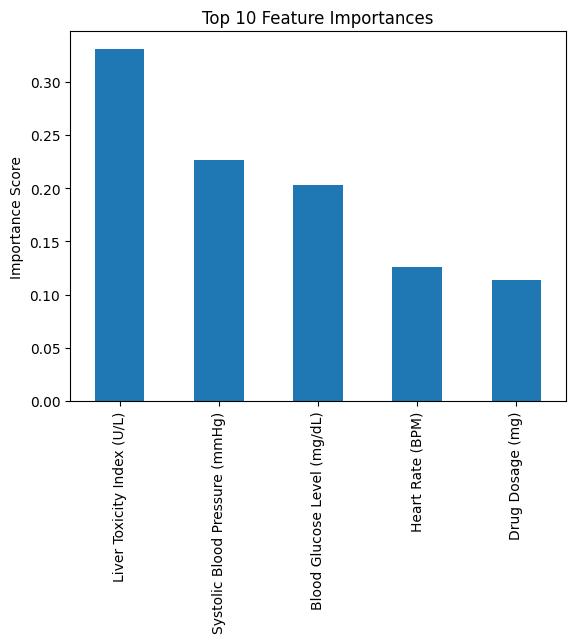

In [21]:
# Visualize feature importances using a bar plot.
import matplotlib.pyplot as plt
importances[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance Score')
plt.show()

# Summary
Data Loading and Exploration: Patient data including biological features and drug response labels (0 = no response, 1 = positive response) are loaded and explored to understand structure, missing values, and class balance.

Data Cleaning and Preprocessing: Missing values are removed for simplicity, and categorical variables are encoded numerically to prepare the data for modeling.

Train-Test Split: The dataset is split into training and testing sets (80-20 split) with stratification to maintain the response class distribution.

Model Training: A Random Forest classifier is trained on the training data. This model is chosen for its robustness and interpretability in healthcare contexts.

Model Evaluation: The model’s performance is evaluated on the test set using classification metrics such as precision, recall, F1-score, confusion matrix, and ROC-AUC score. These metrics assess how well the model predicts drug response.

Interpretation: Feature importance analysis identifies which patient features most influence the drug response prediction, providing clinical insights.